C:\Users\ไพรัตน์\AppData\Local\Temp\ipykernel_65712\2975533817.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



--- เริ่ม Loop ตรวจสอบ Signal Buy ---

⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2024-12-31 23:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-01 00:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-01 01:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-01 02:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-01 03:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-01 04:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 06:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 07:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 08:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 09:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 10:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 11:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 12:00:00
⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ 2025-01-02 13:

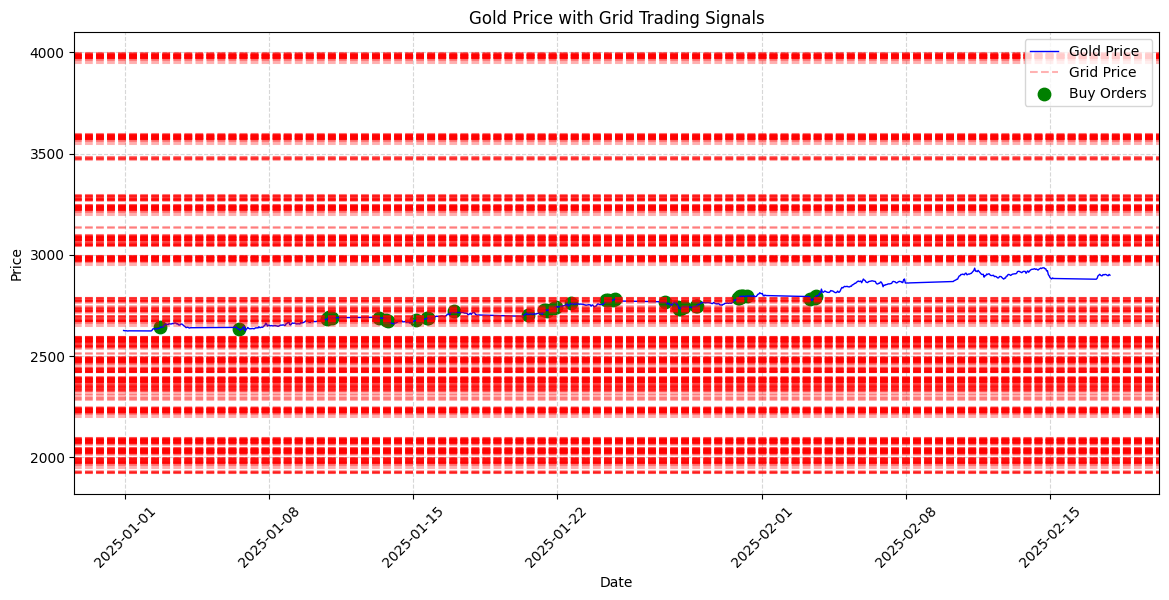

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ ตั้งค่าพารามิเตอร์การเทรด
capital = 10000  # เงินทุนเริ่มต้น
leverage = 100  # เลเวอเรจ
lot_size = 0.1  # ขนาด Lot
pip_value = 0.1  # ราคาของ 1 Pip ใน XAUUSD
target_profit = capital * 0.1  # เป้าหมายกำไร 10% ของทุน ($1,000)

# ✅ โหลดข้อมูลราคาทองคำและ Grid Price
gold_df = pd.read_csv("mt5_data_XAUUSD_TF1H_jan_TH.csv")
grid_df = pd.read_csv("pricegrid_2mount.ipynb_reordered.csv")

# ✅ แปลงคอลัมน์ Date เป็น datetime
gold_df['Date'] = pd.to_datetime(gold_df['Date'], errors='coerce')
grid_df['Date'] = pd.to_datetime(grid_df['Date'], errors='coerce')

# ✅ ลบค่าที่เป็น NaN
gold_df = gold_df.dropna(subset=['Date', 'Close'])
grid_df = grid_df.dropna(subset=['GridPrice'])

# ✅ สร้างลิสต์เก็บ Buy Orders
buy_orders = []
total_profit = 0  # กำไรรวมทั้งหมด

print("\n--- เริ่ม Loop ตรวจสอบ Signal Buy ---\n")

# ✅ Loop ตรวจสอบ Signal Buy
for i in range(1, len(gold_df)):
    close_prev = gold_df.iloc[i - 1]["Close"]
    close_current = gold_df.iloc[i]["Close"]
    date_current = gold_df.iloc[i]["Date"]

    # ✅ ดึง Grid Data ที่เป็นอดีตเท่านั้น (Grid Date ต้อง <= Date ปัจจุบัน)
    valid_grids = grid_df[grid_df["Date"] <= date_current]

    if valid_grids.empty:
        print(f"⏩ ข้ามไปก่อนเพราะยังไม่มี Grid Data ที่เหมาะสม ณ {date_current}")
        continue

    # ✅ ดึง Grid Prices ทั้งหมดในวันนั้น
    grid_prices = valid_grids["GridPrice"].values
    grid_dates = valid_grids["Date"].values  # ดึง Grid Date ทุกอันด้วย

    # 🔎 Debug log
    print(f"\nตรวจสอบข้อมูล: {date_current}")
    print(f"   ➤ Close Prev: {close_prev}")
    print(f"   ➤ Close Current: {close_current}")
    print(f"   ➤ Grid Prices: {grid_prices}")

    # ✅ ตรวจสอบว่า Close แตะ GridPrice ในวันนั้นๆ
    for grid_price, grid_date in zip(grid_prices, grid_dates):
        if min(close_prev, close_current) <= grid_price <= max(close_prev, close_current):
            print(f"   ✅ ตรงเงื่อนไข! เกิด Signal Buy ที่ Grid Price: {grid_price}, Grid Date: {grid_date}")

            # ✅ บันทึกออเดอร์ Buy
            buy_orders.append({
                "Buy Date": date_current,
                "Buy Price": close_current,
                "Grid Price": grid_price,
                "Grid Date": grid_date,
                "Lot Size": lot_size,
                "Status": "Holding"
            })

            # ✅ ลบ Grid Price ที่ใช้แล้วออกจาก DataFrame
            grid_df = grid_df[~((grid_df["GridPrice"] == grid_price) & (grid_df["Date"] == grid_date))]

            break  # ถ้าพบการซื้อแล้ว หยุด loop Grid Price ของวันนั้น

    # ✅ คำนวณกำไรรวม
    total_profit = 0
    for order in buy_orders:
        buy_price = order["Buy Price"]
        profit_per_order = (close_current - buy_price) * lot_size * (1 / pip_value)  # คำนวณกำไร
        total_profit += profit_per_order  # รวมกำไรทุกไม้

    print(f"💰 กำไรรวมปัจจุบัน: ${total_profit:.2f}")

    # ✅ เช็คว่าถึงเป้าหมายกำไรหรือยัง
    if total_profit >= target_profit:
        print("\n🎯 กำไรรวมถึงเป้าหมาย $1,000 ➜ ปรับเงินทุนใหม่\n")
        capital += total_profit  # เพิ่มกำไรเข้าไปในเงินทุน
        target_profit = capital * 0.1  # คำนวณเป้าหมายกำไรใหม่ 10% ของเงินทุนใหม่
        print(f"💸 เงินทุนใหม่: ${capital:.2f} -> เป้าหมายกำไรใหม่: ${target_profit:.2f}\n")

        # รีเซ็ตกำไรรวม
        total_profit = 0

# ✅ แปลงเป็น DataFrame และเรียงลำดับตาม Buy Date
if buy_orders:  # ตรวจสอบว่ามีข้อมูลหรือไม่
    buy_orders_df = pd.DataFrame(buy_orders)
    buy_orders_df = buy_orders_df.sort_values(by="Buy Date").reset_index(drop=True)
else:
    buy_orders_df = pd.DataFrame(columns=["Buy Date", "Buy Price", "Grid Price", "Grid Date", "Lot Size", "Status"])

# ✅ แสดงผลลัพธ์ทั้งหมด
print("\n--- Buy Orders ที่ถืออยู่ ---\n")
print(buy_orders_df)

# ✅ Plot กราฟ
plt.figure(figsize=(14, 6))

# Plot เส้นราคาทองคำ
plt.plot(gold_df["Date"], gold_df["Close"], label="Gold Price", color="blue", linewidth=1)

# Plot Grid Price เป็นเส้นแนวนอน
for price in grid_df["GridPrice"].unique():
    plt.axhline(y=price, color="red", linestyle="--", alpha=0.3, label="Grid Price" if price == grid_df["GridPrice"].unique()[0] else "")

# Plot จุดซื้อ (Buy Orders)
if not buy_orders_df.empty:
    plt.scatter(buy_orders_df["Buy Date"], buy_orders_df["Buy Price"], color="green", label="Buy Orders", marker="o", s=80)

# ✅ ตั้งค่ากราฟ
plt.title("Gold Price with Grid Trading Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)

# ✅ แสดงกราฟ
plt.show()


In [2]:
buy_orders_df

,Buy Date,Buy Price,Grid Price,Grid Date,Lot Size,Status
0,2025-01-02 17:00:00,2642.66,2639.50,2025-01-02 14:00:00,0.1,Holding
1,2025-01-06 13:00:00,2631.53,2632.41,2025-01-03 14:00:00,0.1,Holding
2,2025-01-10 20:00:00,2682.72,2682.41,2025-01-03 14:00:00,0.1,Holding
3,2025-01-10 21:00:00,2688.04,2686.93,2025-01-06 14:00:00,0.1,Holding
4,2025-01-10 22:00:00,2692.73,2689.50,2025-01-02 14:00:00,0.1,Holding
5,2025-01-11 01:00:00,2687.26,2689.46,2025-01-07 14:00:00,0.1,Holding
6,2025-01-13 08:00:00,2685.63,2685.73,2025-01-08 14:00:00,0.1,Holding
7,2025-01-13 17:00:00,2679.50,2684.13,2025-01-09 14:00:00,0.1,Holding
8,2025-01-13 19:00:00,2670.95,2675.90,2025-01-10 14:00:00,0.1,Holding
9,2025-01-15 03:00:00,2676.43,2675.01,2025-01-13 14:00:00,0.1,Holding
